In [1]:
import pandas as pd
from tqdm.notebook import tqdm

from tg.grammar_ru.features import PyMorphyFeaturizer

In [2]:
from tg.grammar_ru import Loc

CORPUS_NAMES = [
    "books.base.zip",
    "pub.base.zip",
    "lenta.base.zip"
]
#TODO: add smth else?

CORPUS_LIST = [Loc.corpus_path / corpus_name for corpus_name in CORPUS_NAMES]

In [3]:
from yo_fluq_ds import *
from tg.grammar_ru import Separator
from tg.grammar_ru.corpus.corpus_reader import CorpusReader

In [ ]:
viewer = Separator.Viewer()

texts = list(CorpusReader.read_frames_from_several_corpora(CORPUS_LIST)
             .feed(fluq.with_progress_bar(console=None))
             .select(viewer.to_text)
             )

In [ ]:
import jsonlines

with jsonlines.open('texts.jsonl', 'w') as write:
    write.write_all(texts)

In [4]:
import jsonlines

with jsonlines.open('texts.jsonl') as read:
    texts2 = [t for t in read]

FileNotFoundError: [Errno 2] No such file or directory: 'texts.jsonl'

In [ ]:
import itertools

sents = list(itertools.chain.from_iterable(text.splitlines() for text in texts2))

In [ ]:
import random

random.shuffle(sents)

In [ ]:
len(sents)

In [58]:
from tg.common import DataBundle

db = DataBundle.load('data/mytest_db.zip')

In [59]:
db.src = db.src.join(db.pymorphy, on='word_id')
db.src.head()

,word_id,sentence_id,word_index,paragraph_id,word_tail,word,word_type,word_length,normal_form,alternatives,...,gender,number,case,aspect,transitivity,person,tense,mood,voice,involvement
0,0,0,0,0,1,Рубинде,ru,7,рубинд,3,...,masc,sing,loct,None,None,None,None,None,None,None
1,1,0,1,0,1,посмотрела,ru,10,посмотреть,1,...,femn,sing,None,perf,tran,None,past,indc,None,None
2,2,0,2,0,1,на,ru,2,на,3,...,None,None,None,None,None,None,None,None,None,None
3,3,0,3,0,0,Серую,ru,5,серый,1,...,femn,sing,accs,None,None,None,None,None,None,None
4,4,0,4,0,1,",",punct,1,",",1,...,None,None,None,None,None,None,None,None,None,None


In [60]:
db.pymorphy[db.pymorphy.POS == 'ADJS'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54627 entries, 12 to 13469575
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   normal_form   54627 non-null  object 
 1   alternatives  54627 non-null  int64  
 2   score         54627 non-null  float64
 3   delta_score   54627 non-null  float64
 4   POS           54627 non-null  object 
 5   animacy       0 non-null      object 
 6   gender        42058 non-null  object 
 7   number        54627 non-null  object 
 8   case          0 non-null      object 
 9   aspect        0 non-null      object 
 10  transitivity  0 non-null      object 
 11  person        0 non-null      object 
 12  tense         0 non-null      object 
 13  mood          0 non-null      object 
 14  voice         0 non-null      object 
 15  involvement   0 non-null      object 
dtypes: float64(2), int64(1), object(13)
memory usage: 7.1+ MB


In [61]:
db.pymorphy[db.pymorphy.POS == 'ADJF'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314286 entries, 3 to 13470082
Data columns (total 16 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   normal_form   1314286 non-null  object 
 1   alternatives  1314286 non-null  int64  
 2   score         1314286 non-null  float64
 3   delta_score   1314286 non-null  float64
 4   POS           1314286 non-null  object 
 5   animacy       52830 non-null    object 
 6   gender        934742 non-null   object 
 7   number        1314286 non-null  object 
 8   case          1314286 non-null  object 
 9   aspect        0 non-null        object 
 10  transitivity  0 non-null        object 
 11  person        0 non-null        object 
 12  tense         0 non-null        object 
 13  mood          0 non-null        object 
 14  voice         0 non-null        object 
 15  involvement   0 non-null        object 
dtypes: float64(2), int64(1), object(13)
memory usage: 170.5+ MB


In [62]:
db.adjectives.head()

,POS_-7,gender_-7,number_-7,case_-7,animacy_-7,aspect_-7,transitivity_-7,person_-7,tense_-7,mood_-7,...,case_7,animacy_7,aspect_7,transitivity_7,person_7,tense_7,mood_7,voice_7,involvement_7,OFFSET_7
0,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,missing,missing,missing,missing,missing,missing,missing,missing,missing,OFFSET_7
1,GRND,missing,missing,missing,missing,perf,tran,missing,past,missing,...,missing,missing,missing,missing,missing,missing,missing,missing,missing,OFFSET_7
2,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,missing,missing,missing,missing,missing,missing,missing,missing,missing,OFFSET_7
3,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,nomn,inan,missing,missing,missing,missing,missing,missing,missing,OFFSET_7
4,ADVB,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,missing,missing,perf,tran,missing,missing,missing,missing,missing,OFFSET_7


In [136]:
import numpy as np

WINDOW_SIZE = 3

In [137]:
NEW = {'ая', 'ого', 'ое', 'ой', 'ом', 'ому',
       'ую', 'ые', 'ый', 'ым', 'ыми', 'ых'}
# NOTE выкинули 'ою'

GOOD = {'ая', 'его', 'ее', 'ей', 'ем', 'ему',
        'ие', 'ий', 'им', 'ими', 'их', 'ую', 'яя', 'юю',
        'ого','ое', 'ой', 'ому', 'ом'} # легкий

BIG = {'ая', 'ие', 'им', 'ими', 'их', 'ого',
       'ое', 'ой', 'ом', 'ому', 'ую',
       'ые', 'ым', 'ыми', 'ых'} # золотой
# NOTE выкинули 'ою'

NEW_list = sorted(list(NEW))
GOOD_list = sorted(list(GOOD))
BIG_list = sorted(list(BIG))
# окончания с повторами. это фича.
ALL_ENDS_list = NEW_list + GOOD_list + BIG_list
POSSIBLE_ENDINGS = set(ALL_ENDS_list)
endings_nums = {e: i for i, e in enumerate(ALL_ENDS_list)}

NEW_num_by_end = {e: i for i, e in enumerate(NEW_list)}
GOOD_num_by_end = {e: i+len(NEW_num_by_end) for i, e in enumerate(GOOD_list)}
BIG_num_by_end = {e: i+len(NEW_num_by_end)+len(GOOD_num_by_end)
                  for i, e in enumerate(BIG_list)}

nums_by_decl_and_end = (
        {('new', e): n for e, n in NEW_num_by_end.items()} |
        {('good', e): n for e, n in GOOD_num_by_end.items()} |
        {('big', e): n for e, n in BIG_num_by_end.items()}
)

In [138]:
def get_ending(word: str) -> str:
    for ending in sorted(ALL_ENDS_list, key=lambda x: len(x), reverse=True):
        if word.endswith(ending):
            return ending
    
    return 'missing'

In [139]:
db.src['normal_form']

0               рубинд
1           посмотреть
2                   на
3                серый
4                    ,
               ...    
13470083         вывод
13470084            из
13470085          банк
13470086         актив
13470087             .
Name: normal_form, Length: 13470088, dtype: object

In [142]:
db.src['ending'] = 'missing'
db.src['normal_ending'] = 'missing'
adj_mask = (db.src.POS.eq('ADJS') | db.src.POS.eq('ADJF'))
db.src.loc[adj_mask, 'ending'] = db.src.loc[adj_mask, 'word'].map(get_ending)
db.src.loc[adj_mask, 'normal_ending'] = db.src.loc[adj_mask, 'normal_form'].map(get_ending)
db.src.ending.head()

0    missing
1    missing
2    missing
3         ую
4    missing
Name: ending, dtype: object

In [141]:
db.src.ending.eq('missing').mean()

0.9090052715320048

In [143]:
features = ['POS', 'gender', 'number', 'case', 'animacy', 'aspect', 'transitivity', 'person', 'tense', 'mood', 'voice', 'involvement']

def get_offset_word_feats(word_row, offset) -> dict:
    result = {}
    for feat in features:
        result[f'{feat}_{offset}'] = word_row[feat]
    return result

def get_empty_feats(offset) -> dict:
    result = {}
    for feat in features:
        result[f'{feat}_{offset}'] = np.nan
    return result


adj_dataset = []

for sent_id, sentence_df in tqdm(db.src.groupby('sentence_id')):
    for idx in sentence_df.index[~sentence_df.normal_ending.eq('missing')]:
        adj_window_data = {}
        for offset in range(-WINDOW_SIZE, WINDOW_SIZE + 1):
            if offset == 0:
                data = sentence_df.loc[idx]
                adj_window_data.update({'POS_0': data.POS, 'ending_norm_0': data.normal_ending, 'ending_0': data.ending})
            elif idx + offset not in sentence_df.index:
                adj_window_data.update(get_empty_feats(offset))
            else:
                adj_window_data.update(get_offset_word_feats(sentence_df.loc[idx + offset], offset))
        
        adj_dataset.append(adj_window_data)
                

  0%|          | 0/710546 [00:00<?, ?it/s]

In [144]:
adj_df = pd.DataFrame.from_records(adj_dataset)
adj_df.head()

,POS_-3,gender_-3,number_-3,case_-3,animacy_-3,aspect_-3,transitivity_-3,person_-3,tense_-3,mood_-3,...,number_3,case_3,animacy_3,aspect_3,transitivity_3,person_3,tense_3,mood_3,voice_3,involvement_3
0,NOUN,masc,sing,loct,inan,None,None,None,None,None,...,plur,nomn,inan,None,None,None,None,None,None,None
1,NONE,None,None,None,None,None,None,None,None,None,...,sing,accs,inan,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,plur,ablt,inan,None,None,None,None,None,None,None
3,PREP,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,NONE,None,None,None,None,None,None,None,None,None,...,sing,accs,None,None,None,None,None,None,None,None


In [145]:
adj_df = adj_df.fillna('missing')
adj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206954 entries, 0 to 1206953
Data columns (total 75 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   POS_-3           1206954 non-null  object
 1   gender_-3        1206954 non-null  object
 2   number_-3        1206954 non-null  object
 3   case_-3          1206954 non-null  object
 4   animacy_-3       1206954 non-null  object
 5   aspect_-3        1206954 non-null  object
 6   transitivity_-3  1206954 non-null  object
 7   person_-3        1206954 non-null  object
 8   tense_-3         1206954 non-null  object
 9   mood_-3          1206954 non-null  object
 10  voice_-3         1206954 non-null  object
 11  involvement_-3   1206954 non-null  object
 12  POS_-2           1206954 non-null  object
 13  gender_-2        1206954 non-null  object
 14  number_-2        1206954 non-null  object
 15  case_-2          1206954 non-null  object
 16  animacy_-2       1206954 non-null  o

In [146]:
adj_df = adj_df.astype('category')
adj_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206954 entries, 0 to 1206953
Data columns (total 75 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   POS_-3           1206954 non-null  category
 1   gender_-3        1206954 non-null  category
 2   number_-3        1206954 non-null  category
 3   case_-3          1206954 non-null  category
 4   animacy_-3       1206954 non-null  category
 5   aspect_-3        1206954 non-null  category
 6   transitivity_-3  1206954 non-null  category
 7   person_-3        1206954 non-null  category
 8   tense_-3         1206954 non-null  category
 9   mood_-3          1206954 non-null  category
 10  voice_-3         1206954 non-null  category
 11  involvement_-3   1206954 non-null  category
 12  POS_-2           1206954 non-null  category
 13  gender_-2        1206954 non-null  category
 14  number_-2        1206954 non-null  category
 15  case_-2          1206954 non-null  category
 16  

In [147]:
db.data_frames['adjectives'] = adj_df
db.adjectives

,POS_-3,gender_-3,number_-3,case_-3,animacy_-3,aspect_-3,transitivity_-3,person_-3,tense_-3,mood_-3,...,number_3,case_3,animacy_3,aspect_3,transitivity_3,person_3,tense_3,mood_3,voice_3,involvement_3
0,NOUN,masc,sing,loct,inan,missing,missing,missing,missing,missing,...,plur,nomn,inan,missing,missing,missing,missing,missing,missing,missing
1,NONE,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,sing,accs,inan,missing,missing,missing,missing,missing,missing,missing
2,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,plur,ablt,inan,missing,missing,missing,missing,missing,missing,missing
3,PREP,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
4,NONE,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,sing,accs,missing,missing,missing,missing,missing,missing,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206949,VERB,missing,sing,missing,missing,perf,tran,3per,futr,indc,...,sing,missing,missing,perf,tran,3per,futr,indc,missing,missing
1206950,VERB,missing,sing,missing,missing,perf,tran,3per,futr,indc,...,plur,missing,missing,impf,tran,3per,pres,indc,missing,missing
1206951,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,sing,nomn,inan,missing,missing,missing,missing,missing,missing,missing
1206952,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,...,sing,missing,missing,perf,missing,missing,past,missing,pssv,missing


In [148]:
db.save_as_zip('mytest_db.zip')

In [150]:
# adj_center_predict_features = ['gender_0', 'number_0', 'case_0', 'animacy_0']
adj_center_predict_features = ['ending_0']
adj_center_expect_features = ['POS_0', 'norm_ending_0']

In [151]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(db.adjectives, test_size=0.2, random_state=228)

In [152]:
len(train_df), len(test_df)

(965563, 241391)

In [153]:
input_features = [col for col in db.adjectives.columns if col[-1] != '0' or col in adj_center_expect_features]
label_features = [col for col in db.adjectives.columns if col in adj_center_predict_features]

In [154]:
for label_feat in label_features:
    print(label_feat, db.adjectives[label_feat].value_counts())

ending_0 ой         168899
ого        131049
ых         107930
ый          85208
ые          82134
их          65789
missing     65705
ая          64519
ое          55103
ом          54541
ий          51273
ым          46384
ую          43786
ие          40832
им          27188
ей          20725
его         19546
ыми         18195
ому         17413
ее          11967
ем          11631
ими         10004
ему          2958
яя           2838
юю           1337
Name: ending_0, dtype: int64


In [155]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(train_df[label_features])

OneHotEncoder(sparse_output=False)

In [156]:
ohe.transform(db.adjectives[label_features])

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [157]:
label_features

['ending_0']

In [158]:
import catboost

In [159]:
train_data = catboost.Pool(data=train_df[input_features], label=train_df[label_features[0]], cat_features=input_features)
test_data = catboost.Pool(data=test_df[input_features], label=test_df[label_features[0]], cat_features=input_features)

In [160]:
params = {
    'objective': 'MultiClass',
    'iterations': 1000,
    'eval_metric': 'TotalF1:average=Weighted',
    'task_type': 'GPU',
    'gpu_ram_part': 0.5,   
}

model = catboost.CatBoostClassifier(
    **params
)

In [161]:
model.fit(
    train_data,
    eval_set=test_data,
    verbose=50,
)

Learning rate set to 0.21052
0:	learn: 0.3005340	test: 0.2997256	best: 0.2997256 (0)	total: 249ms	remaining: 4m 8s
50:	learn: 0.6374521	test: 0.6371032	best: 0.6371032 (50)	total: 12.1s	remaining: 3m 45s
100:	learn: 0.6593680	test: 0.6578991	best: 0.6578991 (100)	total: 23.6s	remaining: 3m 30s
150:	learn: 0.6691346	test: 0.6667234	best: 0.6667234 (150)	total: 40.1s	remaining: 3m 45s
200:	learn: 0.6734056	test: 0.6703625	best: 0.6703625 (200)	total: 58.9s	remaining: 3m 53s
250:	learn: 0.6763620	test: 0.6728788	best: 0.6728788 (250)	total: 1m 17s	remaining: 3m 50s
300:	learn: 0.6781030	test: 0.6739348	best: 0.6739348 (300)	total: 1m 29s	remaining: 3m 27s
350:	learn: 0.6797904	test: 0.6751175	best: 0.6752089 (347)	total: 1m 48s	remaining: 3m 20s
400:	learn: 0.6820424	test: 0.6771182	best: 0.6771413 (399)	total: 2m 7s	remaining: 3m 11s
450:	learn: 0.6833602	test: 0.6782136	best: 0.6782142 (449)	total: 2m 27s	remaining: 2m 59s
500:	learn: 0.6845170	test: 0.6790020	best: 0.6790210 (498)	tota

In [162]:
model.get_feature_importance(prettified=True)[:50]

,Feature Id,Importances
0,case_1,16.258195
1,gender_1,15.449069
2,number_1,12.327766
3,POS_-1,12.260904
4,animacy_-1,3.421444
5,POS_0,2.845301
6,POS_1,2.588566
7,animacy_1,2.445897
8,case_2,2.314683
9,case_-1,2.171780


In [163]:
model.best_score_

{'learn': {'TotalF1:average=Weighted': 0.6953865603758298,
  'MultiClass': 0.7816704477077104},
 'validation': {'TotalF1:average=Weighted': 0.6849936546550611,
  'MultiClass': 0.8147313383680419}}

In [164]:
import pathlib
import joblib

MODEL_PATH = pathlib.Path('data/catboost_adjectives.joblib')
OHE_ADJECTIVES_PATH = pathlib.Path('data/ohe_adjectives.joblib')

In [165]:
model.save_model(MODEL_PATH)
joblib.dump(ohe, OHE_ADJECTIVES_PATH)

['data/ohe_adjectives.joblib']

In [166]:
import pathlib
import joblib
import pymorphy2
import numpy as np
import pandas as pd
import catboost

features = ['POS', 'gender', 'number', 'case', 'animacy', 'aspect', 'transitivity', 'person', 'tense', 'mood', 'voice', 'involvement']

def get_offset_word_feats(word_row, offset: int) -> dict:
    result = {}
    for feat in features:
        result[f'{feat}_{offset}'] = word_row[feat]
    result[f'OFFSET_{offset}'] = f'OFFSET_{offset}'
    return result

def get_empty_feats(offset: int) -> dict:
    result = {}
    for feat in features:
        result[f'{feat}_{offset}'] = np.nan
    result[f'OFFSET_{offset}'] = f'OFFSET_{offset}'
    return result


def inflect_with_labels(morph, word: str, labels: list) -> str:
    parsed = morph.parse(word)[0]
    return parsed.inflect(set(labels) - {'missing', None}).word
    

class AdjectivesSuggestionsGenerator:
    def __init__(self, model_path: pathlib.Path, one_hot_encoding_path: pathlib.Path, window_size: int = 7):
        self._morph = pymorphy2.MorphAnalyzer(lang='ru')
        self._model = catboost.CatBoostClassifier().load_model(str(model_path))
        self._one_hot_encoding = joblib.load(one_hot_encoding_path)
        self._window_size = window_size

    def get_adjectives_suggestions(self, text: str) -> pd.DataFrame | None:
        text_db = Separator.build_bundle(text, [PyMorphyFeaturizer()])
        text_df = text_db.src.join(text_db.pymorphy, on='word_id')
        
        adj_window_datas = []
        indices = []
        
        for idx in text_df.index[text_df.POS.eq('ADJS') | text_df.POS.eq('ADJF')]:
            adj_window_data = {}
            for offset in range(-self._window_size, self._window_size + 1):
                if idx + offset not in text_df.index:
                    adj_window_data.update(get_empty_feats(offset))
                else:
                    adj_window_data.update(get_offset_word_feats(text_df.loc[idx + offset], offset))

            indices.append(idx)
            adj_window_datas.append(adj_window_data)
        
        if not adj_window_datas:
            return None
        
        inp = pd.DataFrame(adj_window_datas)[input_features]
        inp = inp.fillna('missing')
        pool_inp = catboost.Pool(inp, cat_features=input_features)
        predictions_raw = self._model.predict(pool_inp)
        
        words = text_df.word.loc[indices]
        print(predictions_raw)
        # predicted_labels = self._one_hot_encoding.inverse_transform(predictions_raw)
        inflected_words = [word + '_' + labels[0] for word, labels in zip(words, predictions_raw)]
        text_db.src.loc[indices, 'suggestion'] = inflected_words
        return text_db.src

In [167]:
asg = AdjectivesSuggestionsGenerator(MODEL_PATH, OHE_ADJECTIVES_PATH, window_size=WINDOW_SIZE)

In [168]:
def apply_suggestion(word: str, suggestion: str):
    if pd.isna(suggestion):
        return word
    if word.istitle():
        return suggestion.title()
    return suggestion

In [189]:
%%time

test_text = 'Синий машина ехала по скоростная трассе и врезалась в старенькая столбы на ужасная улице'
# test_text = 'цвета морской волны и цвет морской паруса'

df_with_suggestions = asg.get_adjectives_suggestions(test_text)

[['ая']
 ['ой']
 ['ые']
 ['ой']]
CPU times: user 50.1 ms, sys: 1.84 ms, total: 51.9 ms
Wall time: 49.4 ms


In [190]:
df_with_suggestions['word'] = df_with_suggestions[['word', 'suggestion']].apply(lambda x: apply_suggestion(*x), axis=1)
Separator.Viewer().to_text(df_with_suggestions)

'Синий_Ая машина ехала по скоростная_ой трассе и врезалась в старенькая_ые столбы на ужасная_ой улице'

In [191]:
y_valid = test_df[label_features[0]]
len(y_valid)

241391

In [177]:
y_pred = model.predict(test_data)
y_pred

array([['ой'],
       ['ой'],
       ['ой'],
       ...,
       ['ой'],
       ['ого'],
       ['ой']], dtype=object)

In [180]:
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score

f1_score(y_valid, y_pred, average='macro')

0.5432917095229649

In [182]:

accuracy_score(y_valid, y_pred)

0.7088333864974253

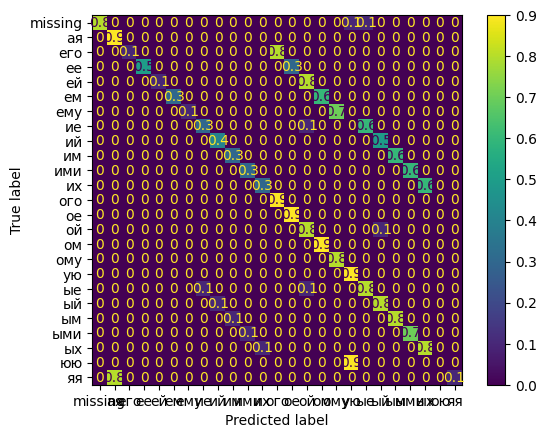

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_valid, y_pred, normalize='true').round(1)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()